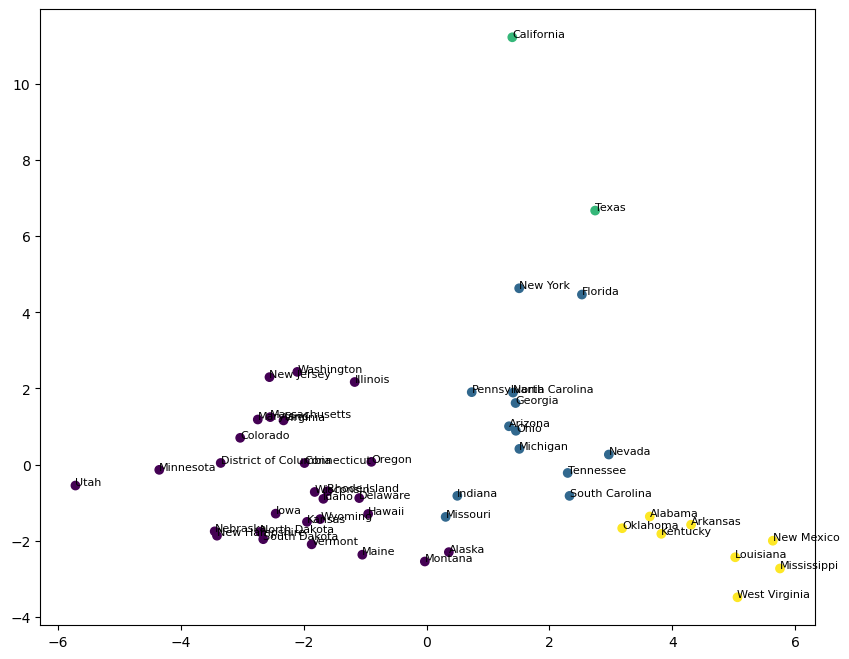

In [60]:
"""
Preprocesses the input data frame by imputing missing values with median, standardizing the features, and applying PCA for dimensionality reduction.

Fits a KMeans clustering model on the PCA-transformed data and plots the clusters.
"""

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score


def preprocess(df):
    imputer = SimpleImputer(strategy="median")
    imputed_df = pd.DataFrame(imputer.fit_transform(df))
    scaled_df = StandardScaler().fit_transform(imputed_df)
    return scaled_df


def display_loadings(fitted_pca, features, component=0):
    loadings = fitted_pca.components_
    order = np.argsort(abs(loadings[component, :]))[::]  # Reverse the order
    loadings = loadings[:, order]
    features = [features[i] for i in order]

    loadings = pd.Series(loadings[component, :], index=features)
    fig, ax = plt.subplots(figsize=(10, 12))
    loadings.plot(kind="barh")

    return loadings


df = pd.read_csv("data/DS_salary_factors.csv", na_values=0)
df["GeoFips"] = df["GeoFips"].astype(str)
numeric_features = df.select_dtypes(include="number").columns
X = df[numeric_features]
X = preprocess(X)
pca = PCA().fit(X)
X_pca = pca.transform(X)
# cluster = KMeans(n_clusters=4, random_state=0).fit(X_pca)
# cluster = SpectralClustering(n_clusters=4, random_state=0).fit(X_pca)
cluster = GaussianMixture(4).fit_predict(X_pca[:, :8])

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster, cmap="viridis")
for i, label in enumerate(df.GeoName):
    ax.text(X_pca[i, 0], X_pca[i, 1], label, fontsize=8)


Gas Tax (cents)                                             -0.004813
percent Good Air Quality Days                                0.011904
Military Insured                                             0.025129
2022 GDP                                                    -0.044922
Property crime rate per 100,000 people                       0.050068
Medicare Insured                                             0.060800
Total Employment in State/Area                               0.070206
Total Civilian Labor Force in State/Area                     0.070390
Total Unemployment in State/Area                             0.073646
Total Civilian Non-Institutional Population in State/Area    0.080206
Non-Group Insured                                           -0.101715
Percent (%) of Labor Force Unemployed in State/Area          0.117922
Poverty (thousands)                                          0.121240
Violent crime rate per 100,000 people                        0.134384
A_MEAN              

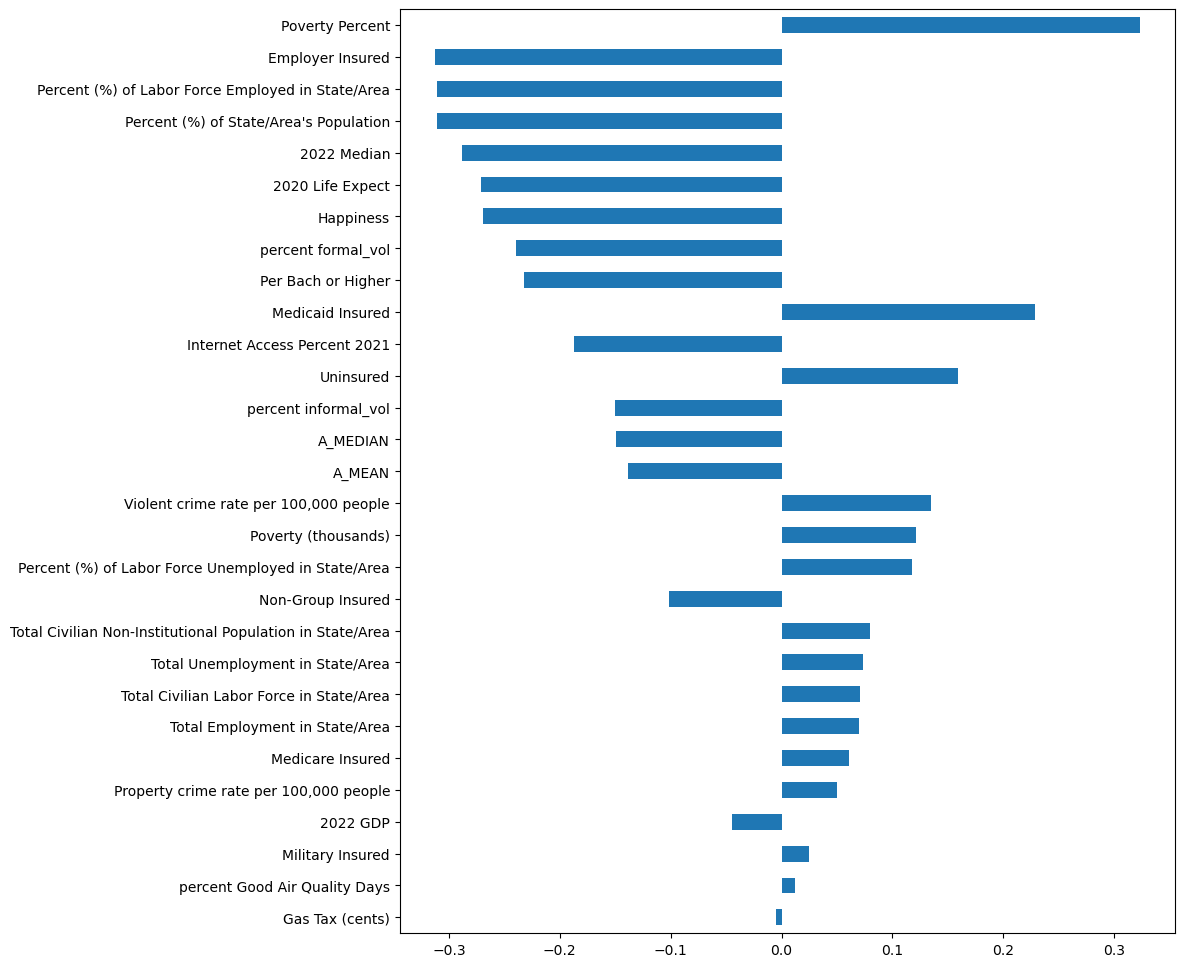

In [36]:
display_loadings(pca, numeric_features)


2022 GDP                                                    -0.014059
A_MEAN                                                       0.026716
Non-Group Insured                                           -0.028075
Employer Insured                                             0.031042
A_MEDIAN                                                    -0.036866
Total Unemployment in State/Area                            -0.044524
Poverty (thousands)                                         -0.045268
Internet Access Percent 2021                                 0.050311
Total Civilian Labor Force in State/Area                    -0.058486
percent formal_vol                                           0.058555
Total Employment in State/Area                              -0.059021
Total Civilian Non-Institutional Population in State/Area   -0.064254
Percent (%) of Labor Force Unemployed in State/Area          0.073721
Happiness                                                   -0.087521
Medicaid Insured    

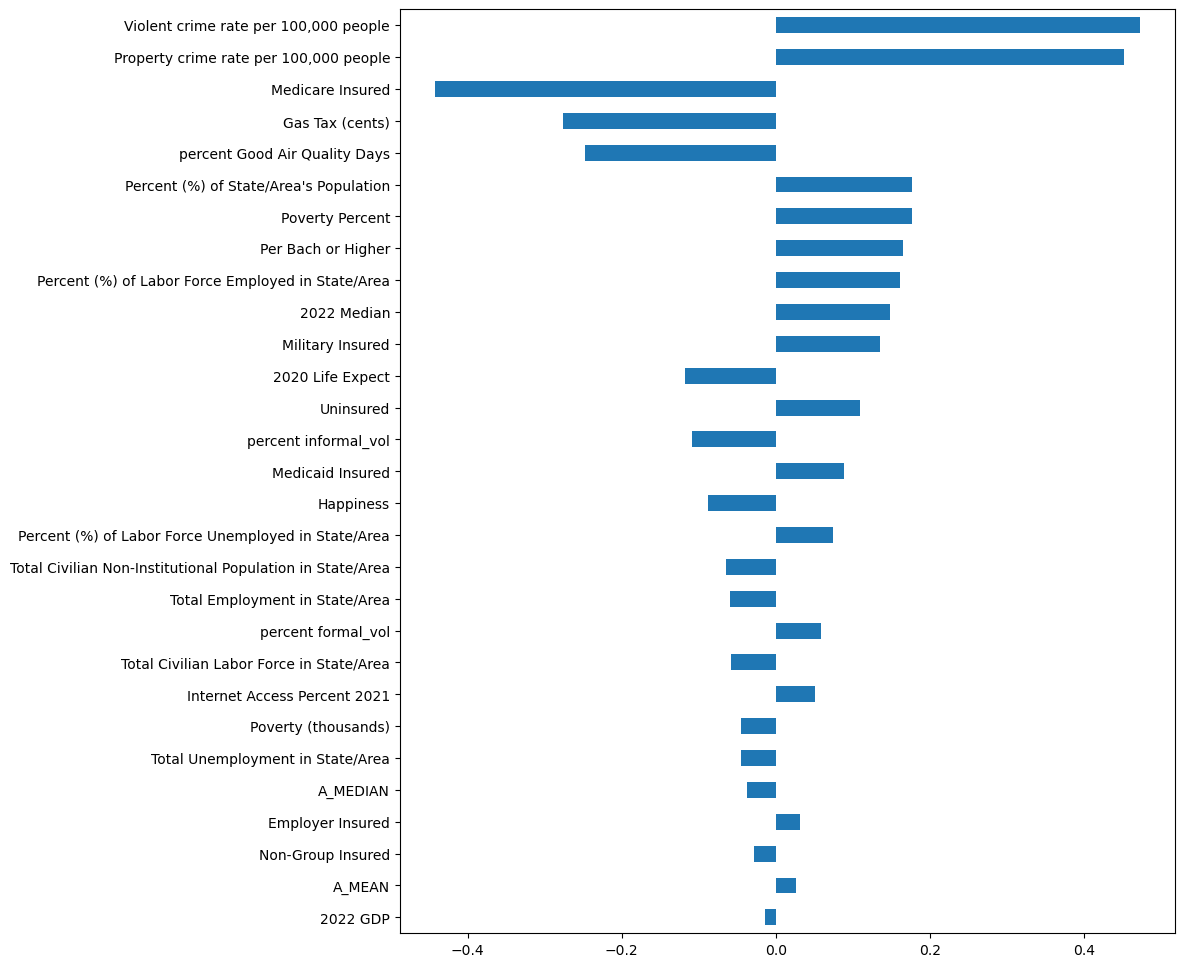

In [37]:
display_loadings(pca, numeric_features, 2)
